<a href="https://colab.research.google.com/github/zhuofachen/Raman_deep_learning/blob/main/Plot_Accuracies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import math
import numpy as np
from matplotlib import pyplot as plt 

#  Plot histogram of prediction accuracies

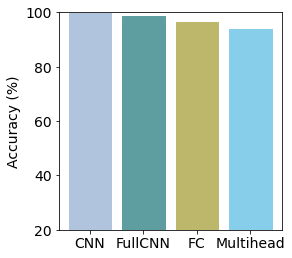

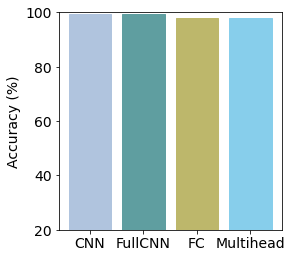

In [ ]:


models = ['CNN', 'FullCNN', 'FC', 'Multihead']
colors = ['lightsteelblue', 'cadetblue', 'darkkhaki', 'skyblue']

acc_mean = [99.59760651, 98.62980648, 96.53109531, 93.91509891] # charge
f2 = plt.figure(figsize=(4,4)) 
# plt.boxplot(accuracy)
barlist = plt.bar(models, acc_mean)
for i in range(4):
    barlist[i].set_color(colors[i])
# plt.legend()
plt.ylim([20, 100])
plt.ylabel("Accuracy (%)")
plt.rcParams.update({'font.size': 14})
plt.savefig('compare_charge_hist.png', bbox_inches = 'tight')
plt.show()

acc_mean = [99.5027326, 99.22980603, 98.04563307, 98.09077431] # dielectric

f1 = plt.figure(figsize=(4,4)) 
# plt.boxplot(accuracy)
barlist = plt.bar(models, acc_mean)
for i in range(4):
    barlist[i].set_color(colors[i])
# plt.legend()
plt.ylim([20, 100])
plt.ylabel("Accuracy (%)")
plt.rcParams.update({'font.size': 14})
plt.savefig('compare_dielectric_hist.png', bbox_inches = 'tight')
plt.show()

# Plot accuracies versus noise levels

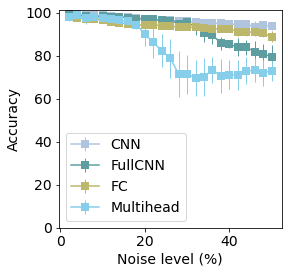

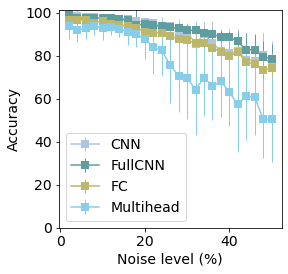

In [ ]:


import collections

def get_noise_mu_std(accs):

    acc_by_noise = collections.defaultdict(list)
    for row in accs:
        agg_acc = row[0]
        noise_factor = row[-1]
        acc_by_noise[noise_factor].append(agg_acc)
    if 0 in acc_by_noise:
      del acc_by_noise[0]

    noisedata = sorted(acc_by_noise.keys())
    ydata = np.zeros((len(noisedata), 3))
    for i, noise in enumerate(noisedata):
        mu = np.mean(acc_by_noise[noise])
        std = np.std(acc_by_noise[noise])

        idx = np.where(np.logical_and(acc_by_noise[noise]<= mu + 2* std, acc_by_noise[noise]>=mu - 2* std))
        # print(idx[0].item())

        new_data = []
        for j in idx[0]:
          new_data.append(acc_by_noise[noise][j])        
        mu = np.mean(new_data)
        std = np.std(new_data)
        ydata[i] = np.array([noise, mu, std])

    return ydata

filesCdata = [
  "noisetest_cnn_classdata",
  "noisetest_dense_classdata",
  "noisetest_fullcnn_classdata",
  "noisetest_multihead_classdata",
]

#  charge doping level dataset
filesTdata = [
  "noisetest_cnn_Tdata",
  "noisetest_dense_Tdata",
  "noisetest_fullcnn_Tdata",
  "noisetest_multihead_Tdata",
]

colors = ['lightsteelblue', 'cadetblue', 'darkkhaki', 'skyblue']
# colors = ['royalblue', 'goldenrod', 'olivedrab', 'chocolate']
models = ['CNN', 'FullCNN', 'FC', 'Multihead']
f1 = plt.figure(figsize=(4, 4))
i = 0
for i, file_name in enumerate(filesCdata):
    data = get_noise_mu_std(torch.load(file_name))
    plt.errorbar(100/data[:, 0], data[:, 1] * 100, yerr = data[:, 2] * 100, color=colors[i], fmt='-s', mfc=colors[i], mec=colors[i], 
                 ecolor =colors[i],capthick=1,elinewidth = 1, markeredgewidth = 2,
                  label = models[i])
plt.legend()
plt.ylim([0, 101])
plt.ylabel("Accuracy")
# plt.xlabel("Raman shift ($cm^{-1}$)")
plt.xlabel("Noise level (%)")
plt.legend(loc="lower left")
plt.rcParams.update({'font.size': 14})
plt.show()

f2 = plt.figure(figsize=(4, 4))
i = 0
for i, file_name in enumerate(filesTdata):
    data = get_noise_mu_std(torch.load(file_name))
    plt.errorbar(100/data[:, 0], data[:, 1] * 100, yerr = data[:, 2] * 100, color=colors[i], fmt='-s', mfc=colors[i], mec=colors[i], 
                 ecolor =colors[i],capthick=1,elinewidth = 1, markeredgewidth = 2,
                  label = models[i])

plt.legend()
plt.ylim([0, 101])
plt.ylabel("Accuracy")
plt.xlabel("Raman shift ($cm^{-1}$)")
plt.xlabel("Noise level (%)")

plt.legend(loc="lower left")
plt.rcParams.update({'font.size': 14})
plt.show()


#  Plot reproducibility and stability

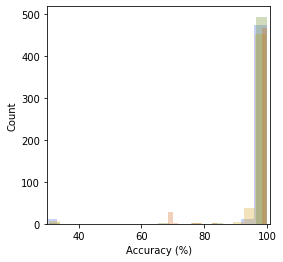

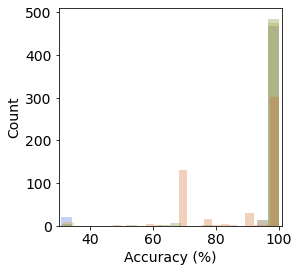

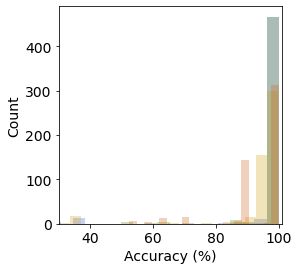

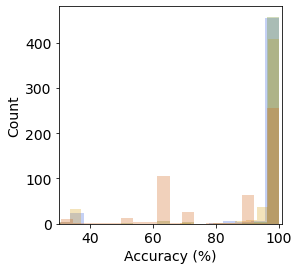

Dielectric data without augmentation [[96.92126628756523, 13.402731442464509], [97.98506708741188, 9.559470454649263], [98.42624357938766, 7.712261258452842], [89.38642504215241, 14.301644145411293]]
Dielectric data with augmentation [[97.63574570715427, 11.091598514874779], [97.09909440279007, 7.946122937984475], [98.7513566493988, 4.9052211628155415], [97.98167344331742, 7.444000102606582]]
charge data without augmentation [[95.37257750034333, 16.06116809648051], [93.74089877605438, 16.491244139691194], [94.66241181492805, 17.35245849408256], [84.58723368048668, 19.01253362029144]]
charge data with augmentation [[96.95650178194046, 12.112249113466335], [94.05390102863312, 11.635627455609498], [96.47565039992332, 11.593096153008744], [93.56690313816071, 9.921102344864783]]


In [ ]:

colors = ['royalblue', 'goldenrod', 'olivedrab', 'chocolate']
def num_bins(accuracy, bin_size):
  return math.ceil(max(accuracy) - min(accuracy)/bin_size)

models = ['CNN', 'FullCNN', 'FC', 'MultiHead']

# set plot x limit and number of bins in the histogram plot
a1 = 30
b1 = 101
a2 = 80
b2 = 101
yL = 0
yU = 500
num_bins = 20
transparacy = 0.3
bin_size = 15


def plot_accs(file_names, figure_title, num_bins):
  f1 = plt.figure(figsize=(4, 4))
  results = []
  for i, file_name in enumerate(file_names):
    accs = torch.load(file_name)
    data = 100*accs[:, 0]
    plt.hist(data, bins = num_bins, color = colors[i], label= models[i], alpha=transparacy)
    results.append([np.mean(data), np.std(data)])
  plt.xlim([a1, b2])
  # plt.legend(loc = "upper left")
  plt.xlabel("Accuracy (%)")
  plt.ylabel("Count")
  plt.rcParams.update({'font.size': 14})
  plt.show()
  return results


def plot_accs_stack(file_names,  num_bins):
  f1, axs = plt.subplots(4, 1, sharex=True, figsize=(3, 8))
  f1.subplots_adjust(hspace=0)
  for i, file_name in enumerate(file_names):
    accs = torch.load(file_name)
    data = 100*accs[:, 0]
    print(accs[1,:])
    break
    axs[i].hist(data, bins = num_bins, color = colors[i], label= models[i], alpha=transparacy)
    axs[i].set_xlim([a1, b2])
    axs[i].set_ylim([yL, yU])
  return f1

filesCdata = [
  "reproducibility_cnn_classdata_augment",
  "reproducibility_fullcnn_classdata_augment",
  "reproducibility_dense_classdata_augment",
  "reproducibility_multihead_classdata_augment",
]

filesCdata_noaugment = [
  "reproducibility_cnn_classdata",
  "reproducibility_fullcnn_classdata",
  "reproducibility_dense_classdata",
  "reproducibility_multihead_classdata",
]


filesTdata = [
  "reproducibility_cnn_Tdata_augment",
  "reproducibility_fullcnn_Tdata_augment",
  "reproducibility_dense_Tdata_augment",
  "reproducibility_multihead_Tdata_augment",
]

filesTdata_noaugment = [
  "reproducibility_cnn_Tdata",
  "reproducibility_fullcnn_Tdata",
  "reproducibility_dense_Tdata",
  "reproducibility_multihead_Tdata",
]


f1 = plot_accs(filesCdata, "Dielectric data with augmentation", 20)
f2 = plot_accs(filesCdata_noaugment, "Dielectric data no augmentation", 20)
f3 = plot_accs(filesTdata, "Charge data with augmentation", 20)
f4 = plot_accs(filesTdata_noaugment, "Charge data no augmentation", 20)
print('Dielectric data without augmentation', f2)
print('Dielectric data with augmentation', f1)
print('charge data without augmentation', f4)
print('charge data with augmentation', f3)

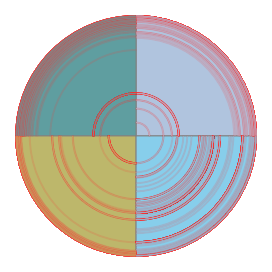

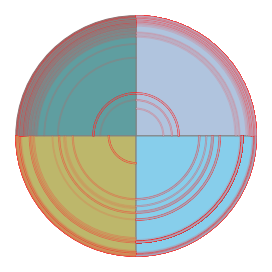

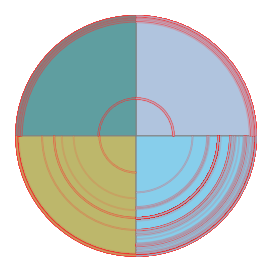

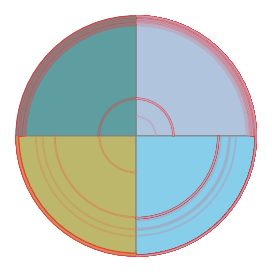

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


models = ['CNN', 'FullCNN', 'FC', 'MultiHead']
colors = ['lightsteelblue', 'cadetblue', 'darkkhaki', 'skyblue']

def plot_pie_chart(file_names, save_file_name):
  f1 = plt.figure(figsize=(4, 4))
  data = []
  for i, file_name in enumerate(file_names):
    accs = torch.load(file_name) 
    data.append(accs[:, 0])
  b = np.array(data)
  # Plotting the outer pie
  plt.pie([1, 1, 1, 1], 
        # labels = models, 
        startangle=0, colors=colors,
        radius= 1.0, 
        textprops ={'fontsize':14},
        wedgeprops=dict(linewidth= 1, edgecolor='gray')
        )
  for i in range(len(data[0])):
    wedges, texts = plt.pie([1, 1, 1, 1], 
          startangle=0, colors=colors,
          radius= 0.8, 
          wedgeprops=dict(linewidth= 1.3, edgecolor=[1, 0.2, 0.2, 0.15], width = 0.005)
          )
    r1, r2,r3, r4 = data[0][i], data[1][i],data[2][i], data[3][i]
    wedges[0].set_radius(r1)
    wedges[1].set_radius(r2)
    wedges[2].set_radius(r3)
    wedges[3].set_radius(r4)
  # Plotting the pie 
  plt.axis('equal')  # equal aspect ratio
  # plt.legend( loc='right', fontsize =15)
  plt.tight_layout()
  plt.show()
  f1.savefig(save_file_name +'.jpg', dpi=400, bbox_inches='tight')

f1 = plot_pie_chart(filesTdata_noaugment, "Reproductivity_Charge_no_augmentation_nolegend")
f2 = plot_pie_chart(filesTdata, "Reproductivity_Charge_augmentation_nolegend")
f3 = plot_pie_chart(filesCdata_noaugment, "Reproductivity_Dielectric_no_augmentation_nolegend")
f4 = plot_pie_chart(filesCdata, "Reproductivity_Dielectric_augmentation_nolegend")

